In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
demand=ctrl.Antecedent(np.arange(0,11,1),'demand')
com_price=ctrl.Antecedent(np.arange(0,101,1),'com_price')
pr_cost=ctrl.Antecedent(np.arange(0,101,1),'pr_cost')
season=ctrl.Antecedent(np.arange(0,11,1),'season')
stock=ctrl.Antecedent(np.arange(0,11,1),'stock')
final_price=ctrl.Consequent(np.arange(0,101,1),'final_price')

In [ ]:
demand['low']=fuzz.trimf(demand.universe,[0,2,4])
demand['medium']=fuzz.trimf(demand.universe,[3,5,7])
demand['high']=fuzz.trimf(demand.universe,[6,8,10])

In [ ]:
com_price['low']=fuzz.trimf(com_price.universe,[0,15,30])
com_price['medium']=fuzz.trimf(com_price.universe,[25,50,70])
com_price['high']=fuzz.trimf(com_price.universe,[60,75,100])

In [ ]:
pr_cost['low']=fuzz.trimf(pr_cost.universe,[0,2,4])
pr_cost['medium']=fuzz.trimf(pr_cost.universe,[3,6,7])
pr_cost['high']=fuzz.trimf(pr_cost.universe,[6,7,10])

In [ ]:
season['off_peak']=fuzz.trimf(season.universe,[0,2,5])
season['normal']=fuzz.trimf(season.universe,[3,6,7])
season['peak']=fuzz.trimf(season.universe,[6,8,10])

In [ ]:
stock['low']=fuzz.trimf(stock.universe,[0,2,4])
stock['medium']=fuzz.trimf(stock.universe,[2,5,7])
stock['high']=fuzz.trimf(stock.universe,[6,9,10])

In [ ]:
final_price['very low']=fuzz.trimf(final_price.universe,[0,15,20])
final_price['low']=fuzz.trimf(final_price.universe,[17,20,40])
final_price['medium']=fuzz.trimf(final_price.universe,[32,42,50])
final_price['high']=fuzz.trimf(final_price.universe,[46,55,70])
final_price['very high']=fuzz.trimf(final_price.universe,[62,80,100])

In [ ]:
rule1=ctrl.Rule(demand['high']& com_price['high']& stock['low'], final_price['very high'])
rule2=ctrl.Rule(demand['high']& season['peak']& stock['low'], final_price['very high'])
rule3=ctrl.Rule(demand['high']& pr_cost['high']& stock['low'], final_price['very high'])

rule4=ctrl.Rule(demand['high']& com_price['medium']& stock['medium'], final_price['high'])
rule5=ctrl.Rule(demand['medium']& com_price['high']& stock['low'], final_price['high'])
rule6=ctrl.Rule(demand['high']& season['peak']& stock['medium'], final_price['high'])

rule7=ctrl.Rule(demand['medium']& com_price['medium']& stock['medium'], final_price['medium'])
rule8=ctrl.Rule(demand['low']& com_price['high']& stock['medium'], final_price['medium'])
rule9=ctrl.Rule(demand['medium']& pr_cost['medium']& stock['medium'], final_price['medium'])

rule10=ctrl.Rule(demand['high']& com_price['low']& stock['high'], final_price['low'])
rule11=ctrl.Rule(demand['medium']& pr_cost['low']& stock['high'], final_price['low'])
rule12=ctrl.Rule(demand['low']& season['off_peak']& stock['high'], final_price['low'])

rule13=ctrl.Rule(demand['low']& com_price['low']& stock['high'], final_price['very low'])
rule14=ctrl.Rule(demand['low']& season['off_peak']& stock['high'], final_price['very low'])
rule15=ctrl.Rule(demand['medium']& com_price['low']& stock['high'], final_price['very low'])

final_price 26.508080808080802


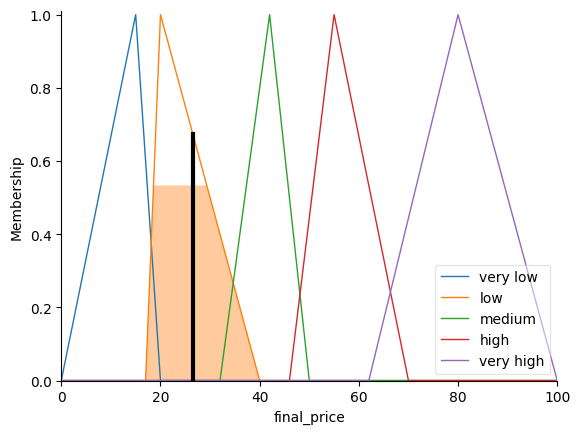

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
system=ctrl.ControlSystemSimulation(control_system)
system.input['demand']=8
system.input['com_price']=22
system.input['pr_cost']=2
system.input['season']=5
system.input['stock']=8
system.compute()
print('final_price',system.output['final_price'])
final_price.view(sim=system)